In [ ]:
#hide
from imstack.core import ImStack
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# ImStack

> A quick and easy way to represent images as a stack of optimizable layers.

Optimizing the pixel values of an image to minimize some loss is common in some applications like style transfer. But because a change to any one pixel doesn't affect much of the image, results are often noisy and slow. By representing an image as a stack of layers at different resolutions, we get parameters that affect a large part of the image (low-res layers) as well as some that can encode fine detail (the high-res layers). There are better ways to do this, but I found myself using this approach enough that I decided to turn it into a proper library. 

Here's a [colab notebook](https://colab.research.google.com/drive/10gSIlqRGom18kl8NZSytyWYciej8H46N?usp=sharing) showing this in action, generating images to match a CLIP prompt.

## Install

This package is available on pypi so install should be as easy as:

`pip install imstack`

## How to use

We create a new image stack like so:

In [ ]:
ims = ImStack(n_layers=3)

By default, the first layer is 32x32 pixels and each subsequent layer is 2x larger. We can visualize the layers with:

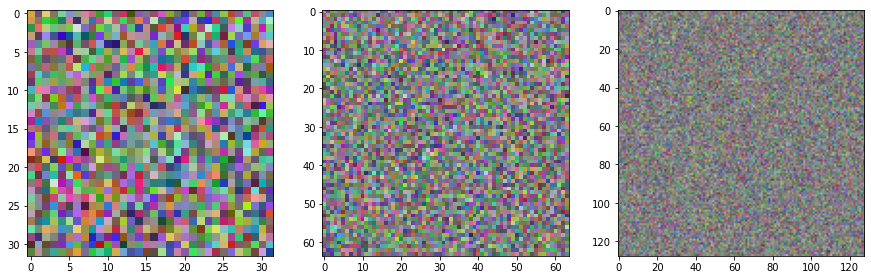

In [ ]:
ims.plot_layers()

The parameters (pixels) of the layers are set to requires_grad=True, so you can pass the layers to an optimizer with something like `optimizer = optim.Adam(ims.layers, lr=0.1, weight_decay=1e-4)` to modify them based on some loss. Calling the forward pass (`image = ims()`) returns a tensor representation of the combined image, suitable for various pytorch operations. 

For convenience, you can also get a PIL Image for easy viewing with:

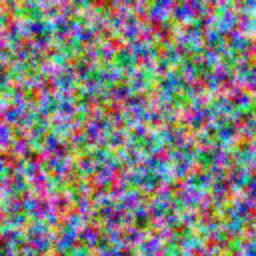

In [ ]:
ims.to_pil()

### Loading images into an ImStack

You don't need to start from scratch - pass in a PIL image and the ImStack will be initialized such that the layers combine to re-create the input image as closely as possible.

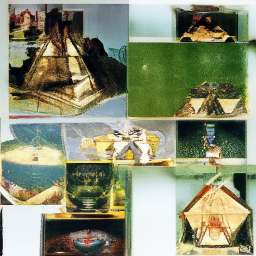

In [ ]:
from PIL import Image

# Load the input image
input_image = Image.open('demo_image.png')
input_image

Note how the lower layers capture broad shapes while the final layer is mostly fine detail.

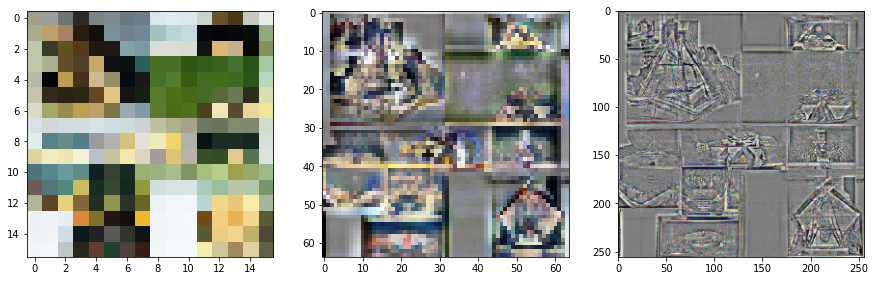

In [ ]:
# Create an image stack with init_image=input_image and plot the layers
ims_w_init = ImStack(n_layers=3, base_size=16, scale=4, out_size=256, init_image=input_image)
ims_w_init.plot_layers()

# Examples

### Text-to-image with ImStack+CLIP
Very fast text-to-image, using CLIP to calculate a loss that measures how well the image matches a text prompt. In this example, the prompt was 'A watercolor painting of an underwater submarine':

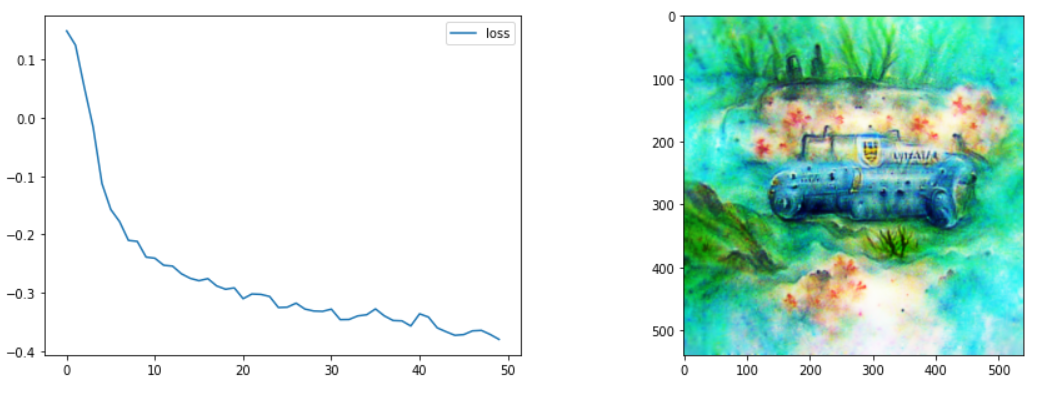

In [ ]:
Image.open('clip_eg.png')

[colab link](https://colab.research.google.com/drive/10gSIlqRGom18kl8NZSytyWYciej8H46N?usp=sharing)

### Style Transfer
Simple style transfer, with an ImStack being optimized such that content loss to one image and style loss to another are minimized.

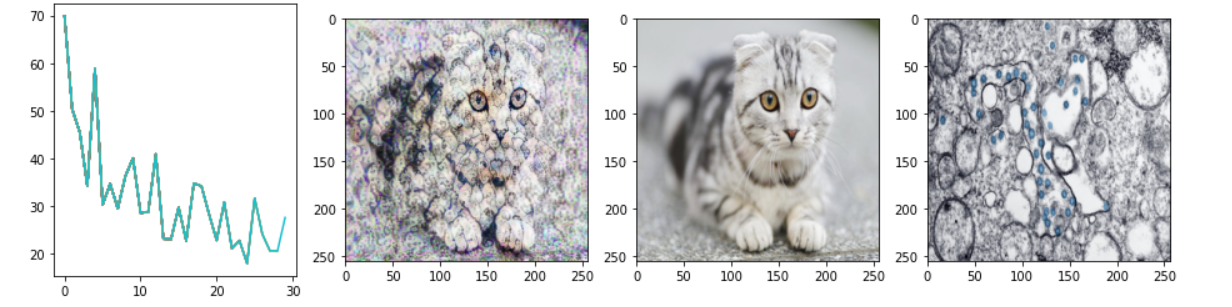

In [ ]:
Image.open('style_tf_eg.png')

[colab link](https://colab.research.google.com/drive/1Zh3OxXE0OWqwzrAhvUBX2VtRBgz87ahQ?usp=sharing)

In [ ]:
#hide
from nbdev.export import notebook2script; notebook2script() # Export via nbdev

Converted 00_core.ipynb.
Converted index.ipynb.
